In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("bank-marketing.csv")
data.shape

(45211, 19)

In [3]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.describe(include=[np.object])

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,2,3,12,4,2
top,blue-collar,married,secondary,yes,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,37091,44396,25130,37967,29285,13766,36959,39922


#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [8]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In above values, it is observed that 75% of values in pdays column is -1 and this represents that this value has special meaning.

#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In pdays column, -1 is an indicator but not value. so lets consider this as Missing and ignore these values in calculating mean and the median values

In [9]:
data1 = data.drop(data[data['pdays']<0].index)

In [10]:
data1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

We can observe that Mean and Median of data is changed after removing -1 value from pdays.

#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

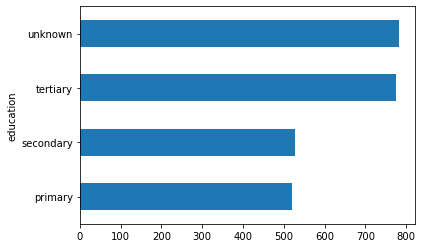

In [11]:
data1.groupby(data1['education'])['balance'].median().plot.barh()
plt.show()

From above graph, it is clear that teritary education level has highest median for balance

#### Make a box plot for pdays. Do you see any outliers?

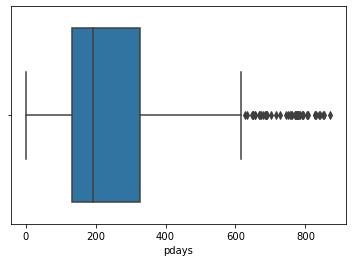

In [12]:
sns.boxplot(data1['pdays'])

Yes we can see outpliers present in pdays column

#### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. 

#### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. 

#### Convert the response variable to a convenient form

In [13]:
data1['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

Converting response values like below:
    'yes'=1
    'no'=0

In [14]:
data1.replace({'response': {'yes': 1,'no':0}},inplace=True)

In [15]:
data1['response'].value_counts()

0    6352
1    1905
Name: response, dtype: int64

#### Make suitable plots for associations with numerical features and categorical features  with 'response' column

In [16]:
data1.job.dtype

dtype('O')

In [17]:
cat_features = []
num_features = []
for i in data1.columns:
    if data1[i].dtype=='O':
        cat_features.append(i)
    else:
        num_features.append(i)
        
print("Categporical Features in Data set: \n",cat_features)
print("Numerical Features in Data set: \n",num_features)

Categporical Features in Data set: 
 ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Features in Data set: 
 ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


#### Plots for Categorical Features with 'response' column

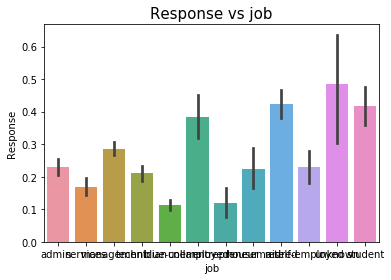

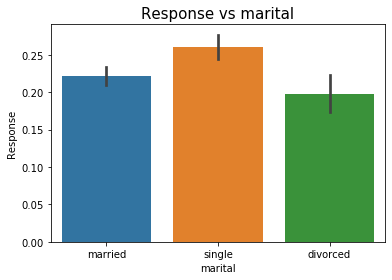

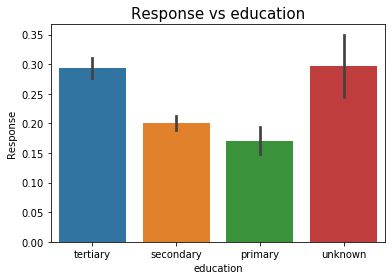

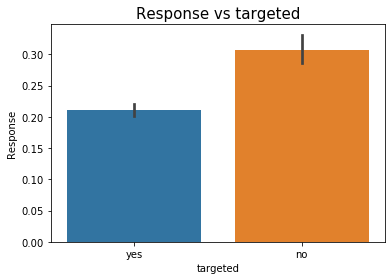

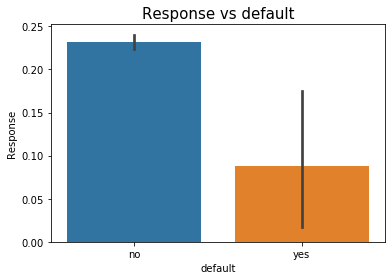

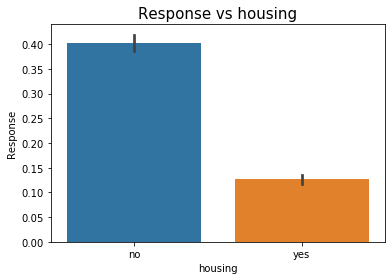

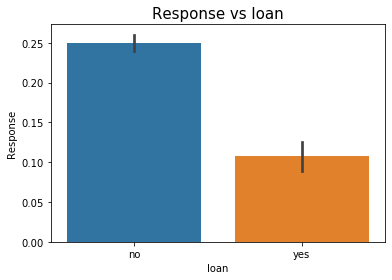

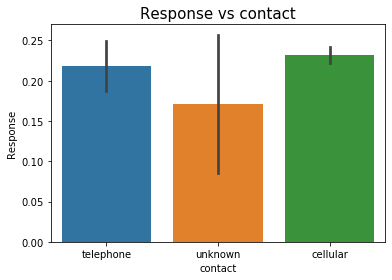

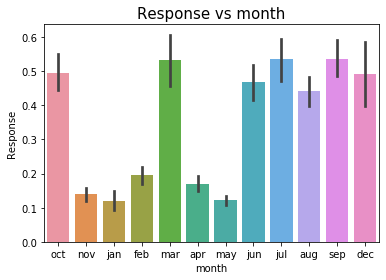

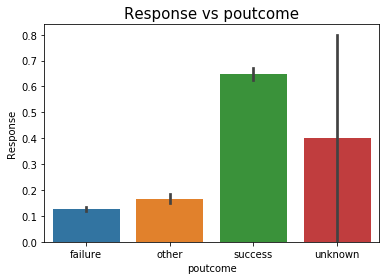

In [18]:
for col in cat_features[:]:
    sns.barplot(data1[col],data1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

#### Plots for Numerical Features with 'response' column

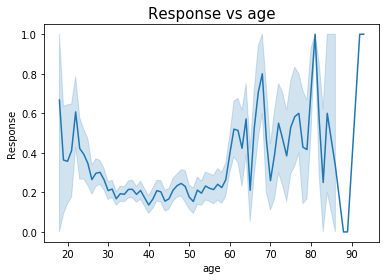

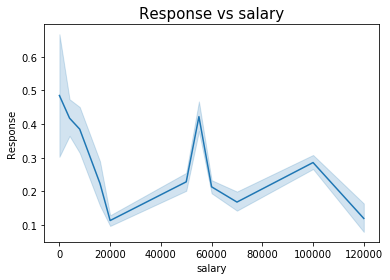

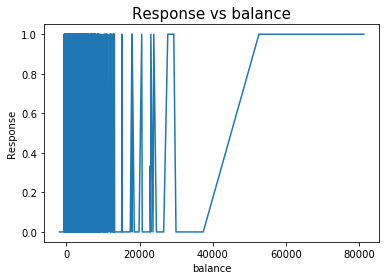

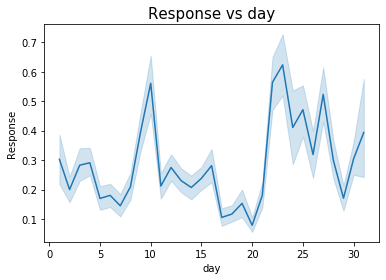

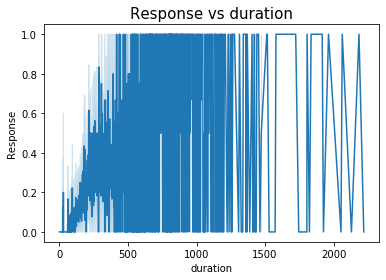

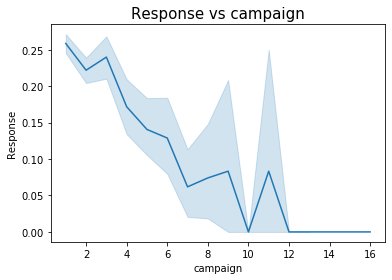

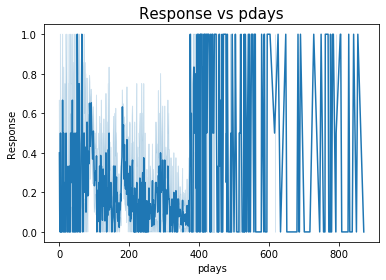

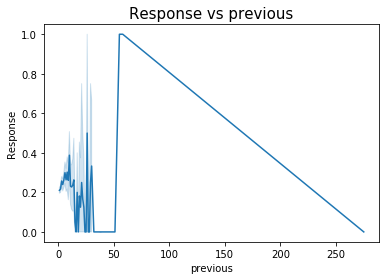

In [19]:
for col in num_features[:-1]:
    sns.lineplot(data1[col],data1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

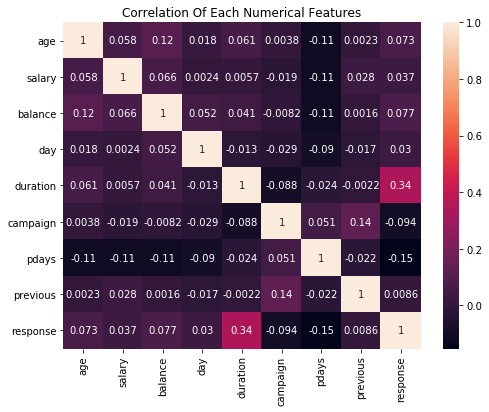

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(),annot=True)
plt.title("Correlation Of Each Numerical Features")
plt.show()

#### Are the features about the previous campaign data useful? 

From above Heat Map, its clear that pdays variable is Negatively or Not Highly Correlated with Response variable. So the features about the previous campaign data useful 

#### Are pdays and poutcome associated with the target?  

Yes

#### how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision. 

I will remove the rows with -1 in pdays column where the previous campaign data is missing

#### The necessary transformations for the categorical variables and the numeric variables 

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transforming Categorical Variables
cat_data = data1[cat_features].apply(le.fit_transform)
cat_data. head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [22]:
data2 = cat_data.join(data1[num_features])
data2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [23]:
data2.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


#### Importing required sklearn libraries

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [25]:
import warnings
warnings.filterwarnings("ignore")

#### Train test split 

In [26]:
X = data2.drop("response",axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [27]:
Y = data2[["response"]]
Y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [28]:
X_train, X_test, Y_train, Y_test = (train_test_split(X,Y,test_size=0.2,random_state=42))

### Predictive model 1: Logistic regression 

#### Make a predictive model using logistic regression 

In [29]:
log = LogisticRegression(random_state=1)
model = log.fit(X_train,Y_train)

In [30]:
model.coef_

array([[ 1.20814598e-02, -4.86143055e-03,  3.86835973e-03,
        -1.05809814e-02, -3.47936491e-04, -2.83951762e-02,
        -8.11737990e-03, -3.84661668e-04, -3.37888966e-02,
         5.18471699e-02, -4.51536364e-03, -2.77431159e-06,
         3.50043248e-05, -3.40945407e-02,  3.12642614e-03,
        -3.30678442e-02, -4.76009056e-03, -1.94536853e-02]])

In [31]:
model.intercept_

array([-0.00636852])

In [32]:
Y_hat = model.predict(X)
Y_hat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
print("Logistic Regression Accuracy: ",model.score(X_train,Y_train))

Logistic Regression Accuracy:  0.779106737320212


#### Use RFE to select top n features in an automated fashion (choose n as you see fit)

RFE which is available in sklearn.feature_selection.RFE. Not getting to deep into the ins and outs, RFE is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. To get a full ranking of features, just set the parameter n_features_to_select = 1. If you set it to anything greater than 1, it will rank the top n as 1 then will descend in order. 

In [34]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(model,n_features_to_select=8)
rfe.fit(X_train,Y_train)
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=['Column','rfe_support','rfe_ranking'])

,Column,rfe_support,rfe_ranking
0,job,False,3
1,marital,False,2
2,education,True,1
3,targeted,True,1
4,default,True,1
5,housing,True,1
6,loan,True,1
7,contact,True,1
8,month,False,5
9,poutcome,True,1


The last method used was sklearn.feature_selection.SelectFromModel. The intended method for this function is that it will select the features by importance and you can just save them as its own features dataframe and directly implement into a tuned model.

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# sfm = SelectFromModel(model,threshold=np.inf,max_features=4)
# sfm.fit(X_train,Y_train)
# feature_idx = sfm.get_support()
# feature_name = X_train.columns[feature_idx]
# feature_name

In [35]:
columns = X_train.columns[rfe.support_]

In [37]:
model.fit(X_train[columns],Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
Y_pred = model.predict(X_test[columns])
f1_score(Y_pred,Y_test)

0.4991334488734836

#### Using p values and VIF, get rid of the redundant features 

Approach :

    Each of the feature indices are passed to variance_inflation_factor() to find the corresponding VIF.
    These values are stored in the form of a Pandas DataFrame.


#### Building model using statsmodel, for the detailed statistics

In [39]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,education,targeted,default,housing,loan,contact,poutcome,campaign
40829,1,1,0,1,0,0,2,1
29715,1,1,0,0,1,0,0,2
35015,1,1,0,1,0,0,0,2
41008,2,0,0,0,0,0,2,2
40646,1,1,0,1,0,1,0,2


In [44]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(X,Y):
    X = sm.add_constant(X) #Adding the constant
    X.dropna(inplace=True)
    lm = sm.OLS(Y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [45]:
X_train_new = build_model(X_train_rfe,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     247.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:58:09   Log-Likelihood:                -2806.5
No. Observations:                6605   AIC:                             5631.
Df Residuals:                    6596   BIC:                             5692.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2871      0.023     12.356      0.0

#### p-value of 'default' seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [46]:
X_train_new = X_train_rfe.drop(["default"], axis = 1)
X_train_new.head()

,education,targeted,housing,loan,contact,poutcome,campaign
40829,1,1,1,0,0,2,1
29715,1,1,0,1,0,0,2
35015,1,1,1,0,0,0,2
41008,2,0,0,0,0,2,2
40646,1,1,1,0,1,0,2


### Model-2

In [47]:
X_train_new = build_model(X_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     283.2
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:58:31   Log-Likelihood:                -2807.1
No. Observations:                6605   AIC:                             5630.
Df Residuals:                    6597   BIC:                             5685.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2867      0.023     12.339      0.0

#### p-value of 'targeted' variable seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [48]:
X_train_new = X_train_new.drop(["targeted"], axis = 1)
X_train_new.head()

,const,education,housing,loan,contact,poutcome,campaign
40829,1.0,1,1,0,0,2,1
29715,1.0,1,0,1,0,0,2
35015,1.0,1,1,0,0,0,2
41008,1.0,2,0,0,0,2,2
40646,1.0,1,1,0,1,0,2


### Model-3

In [49]:
X_train_new = build_model(X_train_new,Y_train)
X_train_new.head()

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     329.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:58:40   Log-Likelihood:                -2808.4
No. Observations:                6605   AIC:                             5631.
Df Residuals:                    6598   BIC:                             5678.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2579      0.014     18.302      0.0

,const,education,housing,loan,contact,poutcome,campaign
40829,1.0,1,1,0,0,2,1
29715,1.0,1,0,1,0,0,2
35015,1.0,1,1,0,0,0,2
41008,1.0,2,0,0,0,2,2
40646,1.0,1,1,0,1,0,2


#### Since P-Value of all columns is less than the significant value 0.05. So Calculate VIF to determine In-Significant values in the data set

In [50]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.56
2,housing,1.12
5,poutcome,1.10
1,education,1.02
3,loan,1.02
4,contact,1.01
6,campaign,1.01


#### Dropping 'housing' because of high VIF value. (shows that curbweight has high multicollinearity.)

In [51]:
X_train_new = X_train_new.drop('housing',axis=1)
X_train_new.head()

,const,education,loan,contact,poutcome,campaign
40829,1.0,1,0,0,2,1
29715,1.0,1,1,0,0,2
35015,1.0,1,0,0,0,2
41008,1.0,2,0,0,2,2
40646,1.0,1,0,1,0,2


### Model-4

In [53]:
X_train_new = build_model(X_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     314.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          7.09e-303
Time:                        11:59:43   Log-Likelihood:                -2969.0
No. Observations:                6605   AIC:                             5950.
Df Residuals:                    6599   BIC:                             5991.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1200      0.012      9.871      0.0

In [54]:
#Dropping contact to see the changes in model statistics as its P-value is greater than 0.05
X_train_new = X_train_new.drop(["contact"], axis = 1)
X_train_new.head()

,const,education,loan,poutcome,campaign
40829,1.0,1,0,2,1
29715,1.0,1,1,0,2
35015,1.0,1,0,0,2
41008,1.0,2,0,2,2
40646,1.0,1,0,0,2


In [55]:
X_train_new = build_model(X_train_new,Y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     391.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          4.55e-303
Time:                        11:59:51   Log-Likelihood:                -2971.6
No. Observations:                6605   AIC:                             5953.
Df Residuals:                    6600   BIC:                             5987.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1170      0.012      9.678      0.0

,Features,VIF
0,const,6.70
3,poutcome,1.02
1,education,1.01
2,loan,1.01
4,campaign,1.00


#### Estimate the model performance using k fold cross validation

In [56]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(model,X_train,Y_train)
np.mean(cv_score)

0.7775927327781983

#### What is the precision, recall, accuracy of your model? 

In [57]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1279
           1       0.71      0.39      0.50       373

    accuracy                           0.83      1652
   macro avg       0.77      0.67      0.70      1652
weighted avg       0.81      0.83      0.80      1652



### ROC and AUC

    ROC = Receiver Operating Characteristics Curve
    AUC = Area Under ROC Curve


In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

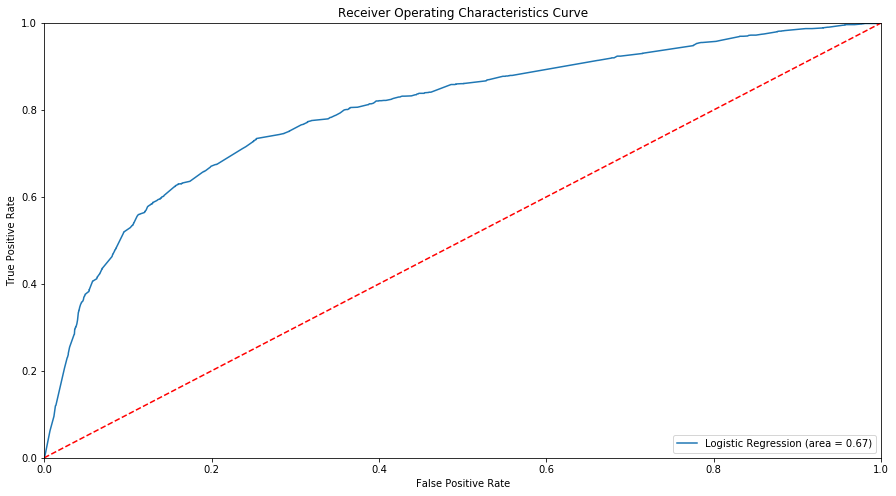

In [59]:
roc_score = roc_auc_score(Y_train, model.predict(X_train[columns]))
fpr, tpr, thresholds = roc_curve(Y_train, model.predict_proba(X_train[columns])[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

#### Which features are the most important from your model? 

### According to RFE of Logistic Regression, education, campaign, loan, poutcome are most important features 

## Predictive model 2: Random Forest 

#### Make a predictive model using random forest technique

In [60]:
from sklearn.ensemble import RandomForestClassifier

#### Use not more than 50 trees, and control the depth of the trees to prevent overfitting 

In [61]:
forest = RandomForestClassifier(max_depth = 5, max_leaf_nodes = 50,criterion='entropy',random_state=42)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [62]:
forest.score(X_train,Y_train)

0.8426949280847843

#### Estimate the model performance using k fold cross validation

In [63]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(forest,X_train,Y_train,cv=5)
np.mean(cv_score)

0.838455715367146

#### What is the precision, recall, accuracy of your model? 

In [64]:
Y_forest_pred = forest.predict(X_test)
f1_score(Y_forest_pred,Y_test)

0.5836177474402731

In [65]:
print(classification_report(Y_test,Y_forest_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.46      0.58       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.75      1652
weighted avg       0.85      0.85      0.84      1652



#### Using the feature importance values from the Random Forest module, identify the most important features for the model 

In [66]:
importances = pd.DataFrame({'feature':X_test.columns, 'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
poutcome,0.321
duration,0.308
housing,0.126
pdays,0.080
month,0.051
age,0.020
day,0.018
balance,0.016
job,0.016


#### According to Feature Importance of Random Forest Classifier, duration, poutcome, pdays, housing  are most important features

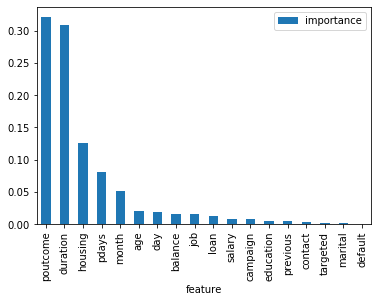

In [67]:
importances.plot.bar()

#### Compare the performance of the Random Forest and the logistic model –  

#### Evaluate both models on the test set 

In [74]:
# Predicted Values of Logistic Regression Model
log_pred = model.predict(X_test[columns])
print(pd.DataFrame(log_pred,columns = ['response']))

      response
0            0
1            0
2            0
3            0
4            0
...        ...
1647         0
1648         0
1649         0
1650         1
1651         0

[1652 rows x 1 columns]


In [69]:
# Predicted Values of Random Forest Classifier Model
forest_pred = forest.predict(X_test)
print(pd.DataFrame(forest_pred,columns = ['response']))

      response
0            0
1            0
2            0
3            0
4            0
...        ...
1647         0
1648         0
1649         0
1650         1
1651         0

[1652 rows x 1 columns]


In [70]:
# Actual values
print(Y_test)

       response
34622         0
43964         0
39501         0
34311         0
44827         1
...         ...
26865         0
38428         1
38913         0
41405         1
37527         0

[1652 rows x 1 columns]


#### Which model has better performance on the test set?  

In [72]:
print("Logistic Regression Accuracy: ",model.score(X_train[columns],Y_train))
print("RandomForestClassifier Accuracy: ",forest.score(X_train,Y_train))

Logistic Regression Accuracy:  0.8165026495079485
RandomForestClassifier Accuracy:  0.8426949280847843


#### As per Accuracy of both models, Random Forest Model has better performance on the test set

#### Compare the feature importance from the different models – do they agree? Are the top features similar in both models? 

According to Feature Importance of Random Forest Classifier, duration, poutcome, pdays, housing are most important features

According to RFE of Logistic Regression, education, campaign, loan, poutcome are most important features

Only one feature is similar in both models